<a href="https://colab.research.google.com/github/Davioliveira1305/Redes-Complexas/blob/main/Trabalho_2_redes_complexas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questão 1

## Item 1

In [ ]:
import networkx as nx
# Carregar o grafo
grafo = nx.read_gml('/content/football.gml')

In [ ]:
import matplotlib.pyplot as plt

# Função para plotar a rede
def plot_rede(grafo):
    fig, ax = plt.subplots(1,1,figsize=(15,10))
    # network
    G = grafo
    # layout position
    pos = nx.kamada_kawai_layout(G)
    # draw edges
    nx.draw_networkx_edges(G,
                        pos=pos,
                        edge_color = 'red',
                        alpha=0.4,
                        ax=ax)
    # draw nodes
    nodes = nx.draw_networkx_nodes(G,
                                node_size=1000,
                                pos=pos,
                                cmap=plt.cm.jet,
                                ax=ax)
    # draw labels
    nx.draw_networkx_labels(G,
                            pos=pos,
                            font_color='black',
                            ax=ax)
    plt.axis("off")
    plt.show()

### Visualização da rede

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


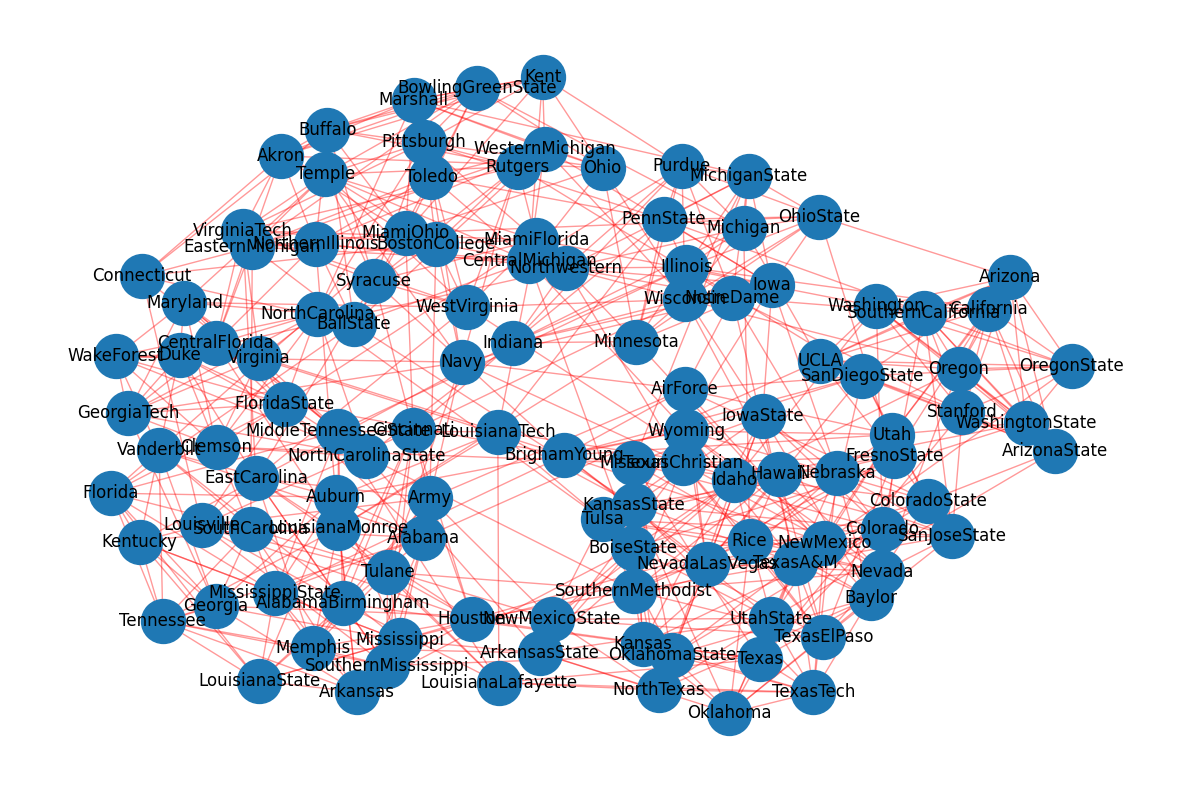

In [ ]:
plot_rede(grafo)

## Item 2: Encontre o número de comunidades da rede retornado pela função do networkx greedy_modularity_communities().

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities
comunidades = greedy_modularity_communities(grafo)
# Comunidades em forma de lista de lista
comunidades_lista = []
print(f'Foram identificadas {len(comunidades)} comunidades')
for i in range(len(comunidades)):
  comunidades_lista.append(list(comunidades[i]))
  print(f'Comunidade {i + 1} são: {list(comunidades[i])}')

Foram identificadas 6 comunidades
Comunidade 1 são: ['Tulane', 'CentralFlorida', 'Army', 'Connecticut', 'SouthernMississippi', 'Vanderbilt', 'SouthCarolina', 'Arkansas', 'Alabama', 'Memphis', 'LouisianaState', 'LouisianaTech', 'Mississippi', 'MississippiState', 'Florida', 'AlabamaBirmingham', 'Louisville', 'Cincinnati', 'Kentucky', 'MiddleTennesseeState', 'Tennessee', 'LouisianaLafayette', 'EastCarolina', 'Georgia', 'Houston', 'LouisianaMonroe', 'Auburn']
Comunidade 2 são: ['SanDiegoState', 'Hawaii', 'Nevada', 'AirForce', 'Utah', 'Rice', 'SanJoseState', 'FresnoState', 'TexasChristian', 'SouthernCalifornia', 'Wyoming', 'OregonState', 'WashingtonState', 'SouthernMethodist', 'ColoradoState', 'UCLA', 'California', 'ArizonaState', 'Stanford', 'BrighamYoung', 'Tulsa', 'Arizona', 'Oregon', 'NevadaLasVegas', 'Washington']
Comunidade 3 são: ['Colorado', 'OklahomaState', 'IowaState', 'ArkansasState', 'KansasState', 'BoiseState', 'Nebraska', 'Kansas', 'TexasA&M', 'TexasElPaso', 'Missouri', 'Baylo

## Item 3: Aplique a função do networkx girvan_newman() a rede com o mesmo número de comunidades gerado em 1.

In [ ]:
from networkx.algorithms.community import girvan_newman
# Gerador de comunidades
gerador_comunidades = girvan_newman(grafo)

# O número de comunidades vai ser a quantidades de comunidades geradas pelo o algoritmo anterior
num_com = len(comunidades)
com = None

for i, com in enumerate(gerador_comunidades):
    if len(com) == num_com:
        break

# Comunidades
com = [list(comm) for comm in com]

print(f"Divisão em {num_com} comunidades:")
for idx, community in enumerate(com):
    print(f"Comunidade {idx + 1}: {sorted(community)}")

Divisão em 6 comunidades:
Comunidade 1: ['AirForce', 'Arizona', 'ArizonaState', 'ArkansasState', 'BoiseState', 'BrighamYoung', 'California', 'ColoradoState', 'FresnoState', 'Hawaii', 'Idaho', 'Nevada', 'NevadaLasVegas', 'NewMexico', 'NewMexicoState', 'NorthTexas', 'Oregon', 'OregonState', 'Rice', 'SanDiegoState', 'SanJoseState', 'SouthernCalifornia', 'SouthernMethodist', 'Stanford', 'TexasChristian', 'TexasElPaso', 'Tulsa', 'UCLA', 'Utah', 'UtahState', 'Washington', 'WashingtonState', 'Wyoming']
Comunidade 2: ['BostonCollege', 'Clemson', 'Duke', 'FloridaState', 'GeorgiaTech', 'Maryland', 'MiamiFlorida', 'Navy', 'NorthCarolina', 'NorthCarolinaState', 'Pittsburgh', 'Rutgers', 'Syracuse', 'Temple', 'Virginia', 'VirginiaTech', 'WakeForest', 'WestVirginia']
Comunidade 3: ['Illinois', 'Indiana', 'Iowa', 'Michigan', 'MichiganState', 'Minnesota', 'Northwestern', 'OhioState', 'PennState', 'Purdue', 'Wisconsin']
Comunidade 4: ['Baylor', 'Colorado', 'IowaState', 'Kansas', 'KansasState', 'Missouri

## Item 4: Gere gráficos para visualizar os resultados de 2 e 3.

In [ ]:
def plot_comunidades(grafo, comunidades):
  G = grafo
  # Atribuir uma cor para cada comunidade
  color = {}
  colors = plt.cm.get_cmap('tab10', len(comunidades))
  # layout position
  pos = nx.kamada_kawai_layout(G)
  # draw edges
  for idx, comunidade in enumerate(comunidades):
      for node in comunidade:
          color[node] = colors(idx)

  # Plotar o grafo com as comunidades
  plt.figure(figsize=(12, 8))
  nx.draw(G, pos, node_color=[color[node] for node in G.nodes()], with_labels=True, node_size=500, font_size=10, font_color='black')
  plt.title("Comunidades")
  plt.show()

### Comunidades pelo algoritmo greedy_modularity_communities

<ipython-input-6-8afe0f0b61c9>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(comunidades))


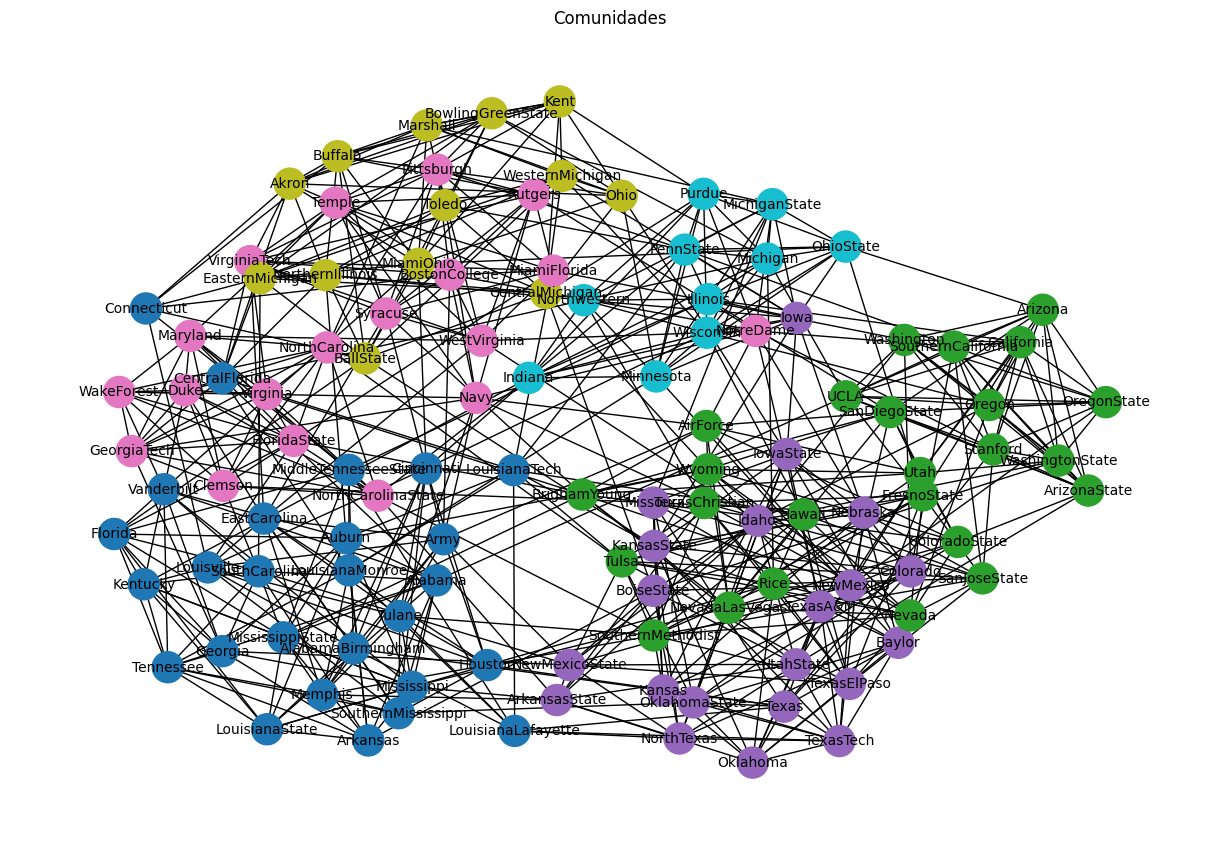

In [ ]:
plot_comunidades(grafo, comunidades_lista)

### Comunidades geradas pelo algoritmo girvan_newman

<ipython-input-6-8afe0f0b61c9>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(comunidades))


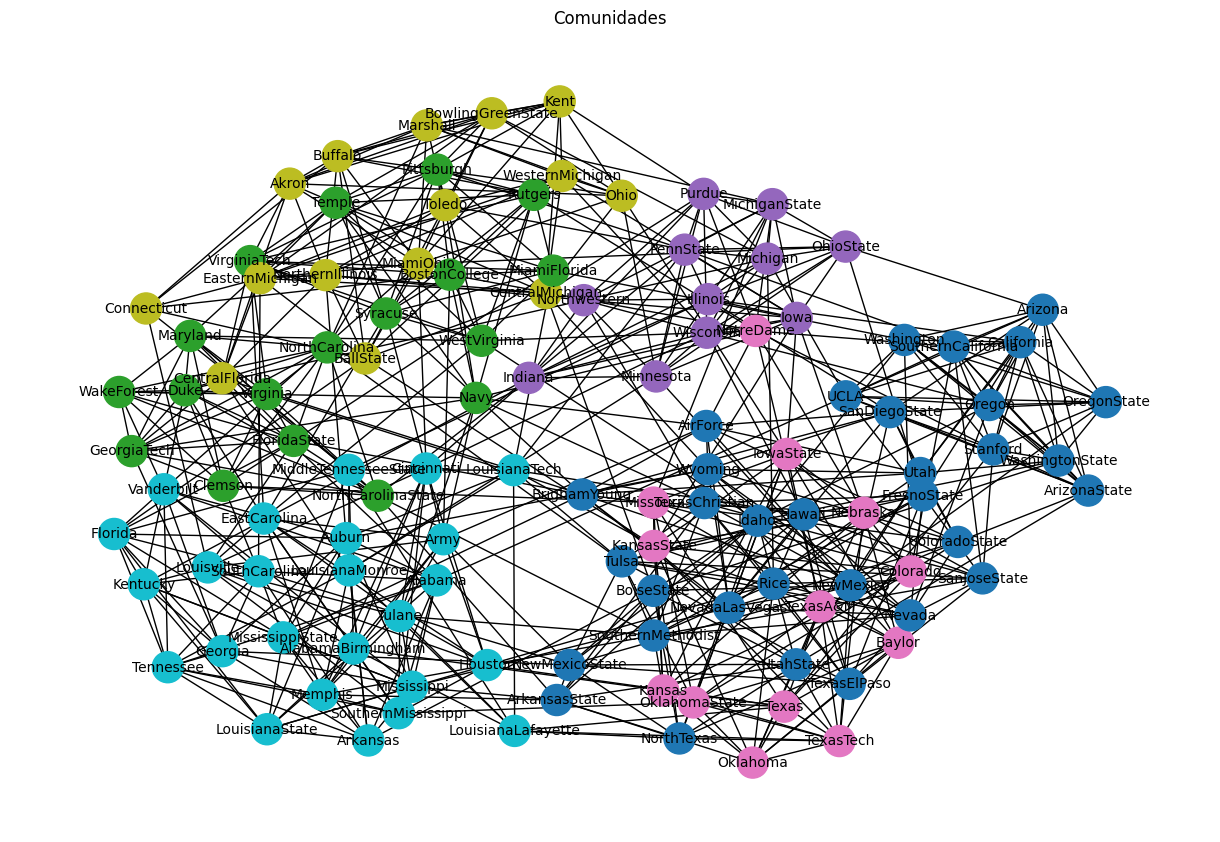

In [ ]:
plot_comunidades(grafo, com)

## Item 5: Quais suas conclusões/observações de acordo com os experimentos.

As conclusões indicam que, embora os algoritmos utilizem estratégias diferentes para a detecção de comunidades, os resultados obtidos foram bastante semelhantes, com comunidades bem parecidas.

# Questão 2

## Item 1: Gere redes de tamanho 1000 e probabilidade para criação de arestas igual a 0.2, 0.3 e 0.5.

In [ ]:
# Rede aleatória 1 p = 0.2
rede_1 = nx.erdos_renyi_graph(1000, 0.2, seed=None, directed=False)
# Rede aleatória 2 p = 0.3
rede_2 = nx.erdos_renyi_graph(1000, 0.3, seed=None, directed=False)
# Rede aleatória 3 p = 0.5
rede_3 = nx.erdos_renyi_graph(1000, 0.5, seed=None, directed=False)

## Item 2: Calcule para cada rede: centralidade de grau, valor médio do comprimento dos caminhos geodésicos, densidade, coeficiente de agrupamento e o diâmetro.

### Centralidade de grau das redes

In [ ]:
# Centralidade de grau da rede 1
cd_rede_1 = nx.degree_centrality(rede_1)
for chave, valor in cd_rede_1.items():
  print(f'Vértice {chave} tem centralidade de grau {valor}')

Vértice 0 tem centralidade de grau 0.1981981981981982
Vértice 1 tem centralidade de grau 0.20520520520520522
Vértice 2 tem centralidade de grau 0.17717717717717718
Vértice 3 tem centralidade de grau 0.2022022022022022
Vértice 4 tem centralidade de grau 0.1991991991991992
Vértice 5 tem centralidade de grau 0.17217217217217218
Vértice 6 tem centralidade de grau 0.1991991991991992
Vértice 7 tem centralidade de grau 0.22422422422422422
Vértice 8 tem centralidade de grau 0.1941941941941942
Vértice 9 tem centralidade de grau 0.1961961961961962
Vértice 10 tem centralidade de grau 0.1841841841841842
Vértice 11 tem centralidade de grau 0.2072072072072072
Vértice 12 tem centralidade de grau 0.1891891891891892
Vértice 13 tem centralidade de grau 0.2112112112112112
Vértice 14 tem centralidade de grau 0.2222222222222222
Vértice 15 tem centralidade de grau 0.2032032032032032
Vértice 16 tem centralidade de grau 0.17617617617617617
Vértice 17 tem centralidade de grau 0.2032032032032032
Vértice 18 tem 

In [ ]:
# Centralidade de grau da rede 2
cd_rede_2 = nx.degree_centrality(rede_2)
for chave, valor in cd_rede_2.items():
  print(f'Vértice {chave} tem centralidade de grau {valor}')

Vértice 0 tem centralidade de grau 0.29929929929929927
Vértice 1 tem centralidade de grau 0.2902902902902903
Vértice 2 tem centralidade de grau 0.2802802802802803
Vértice 3 tem centralidade de grau 0.3033033033033033
Vértice 4 tem centralidade de grau 0.2852852852852853
Vértice 5 tem centralidade de grau 0.3073073073073073
Vértice 6 tem centralidade de grau 0.32232232232232233
Vértice 7 tem centralidade de grau 0.3103103103103103
Vértice 8 tem centralidade de grau 0.3183183183183183
Vértice 9 tem centralidade de grau 0.3073073073073073
Vértice 10 tem centralidade de grau 0.2932932932932933
Vértice 11 tem centralidade de grau 0.3053053053053053
Vértice 12 tem centralidade de grau 0.31431431431431434
Vértice 13 tem centralidade de grau 0.27427427427427425
Vértice 14 tem centralidade de grau 0.3113113113113113
Vértice 15 tem centralidade de grau 0.3063063063063063
Vértice 16 tem centralidade de grau 0.3163163163163163
Vértice 17 tem centralidade de grau 0.3133133133133133
Vértice 18 tem c

In [ ]:
# Centralidade de grau da rede 3
cd_rede_3 = nx.degree_centrality(rede_3)
for chave, valor in cd_rede_3.items():
  print(f'Vértice {chave} tem centralidade de grau {valor}')

Vértice 0 tem centralidade de grau 0.48648648648648646
Vértice 1 tem centralidade de grau 0.5055055055055055
Vértice 2 tem centralidade de grau 0.5135135135135135
Vértice 3 tem centralidade de grau 0.4804804804804805
Vértice 4 tem centralidade de grau 0.5015015015015015
Vértice 5 tem centralidade de grau 0.4794794794794795
Vértice 6 tem centralidade de grau 0.4994994994994995
Vértice 7 tem centralidade de grau 0.5045045045045045
Vértice 8 tem centralidade de grau 0.4904904904904905
Vértice 9 tem centralidade de grau 0.5175175175175175
Vértice 10 tem centralidade de grau 0.5145145145145145
Vértice 11 tem centralidade de grau 0.4954954954954955
Vértice 12 tem centralidade de grau 0.48148148148148145
Vértice 13 tem centralidade de grau 0.5305305305305306
Vértice 14 tem centralidade de grau 0.5015015015015015
Vértice 15 tem centralidade de grau 0.5185185185185185
Vértice 16 tem centralidade de grau 0.5075075075075075
Vértice 17 tem centralidade de grau 0.5115115115115115
Vértice 18 tem cen

### valor médio do comprimento dos caminhos geodésicos das redes aleatórias.

In [ ]:
vccg_1 = nx.average_shortest_path_length(rede_1)
print(f'Valor médio do comprimento dos caminhos geodésicos da rede 1 é {vccg_1}')
vccg_2 = nx.average_shortest_path_length(rede_2)
print(f'Valor médio do comprimento dos caminhos geodésicos da rede 2 é {vccg_2}')
vccg_3 = nx.average_shortest_path_length(rede_3)
print(f'Valor médio do comprimento dos caminhos geodésicos da rede 3 é {vccg_3}')

Valor médio do comprimento dos caminhos geodésicos da rede 1 é 1.7996716716716716
Valor médio do comprimento dos caminhos geodésicos da rede 2 é 1.699863863863864
Valor médio do comprimento dos caminhos geodésicos da rede 3 é 1.5002942942942943


### Densidade das redes aleatórias

In [ ]:
densidade_rede_1 = nx.density(rede_1)
print(f'A densidade da rede 1 é {densidade_rede_1}')
densidade_rede_2 = nx.density(rede_2)
print(f'A densidade da rede 2 é {densidade_rede_2}')
densidade_rede_3 = nx.density(rede_3)
print(f'A densidade da rede 3 é {densidade_rede_3}')

A densidade da rede 1 é 0.20032832832832834
A densidade da rede 2 é 0.30013613613613616
A densidade da rede 3 é 0.4997057057057057


### Coeficiente de Agrupamento das redes aleatórias

In [ ]:
# Coeficientes de agrupamento dos vértices da rede 1
coef_rede_1 = nx.clustering(rede_1)
for chave, valor in coef_rede_1.items():
  print(f'Vértice {chave} tem coeficiente de agrupamento igual a {valor}')

Vértice 0 tem coeficiente de agrupamento igual a 0.19473927088140286
Vértice 1 tem coeficiente de agrupamento igual a 0.19985652797704448
Vértice 2 tem coeficiente de agrupamento igual a 0.2025552131484335
Vértice 3 tem coeficiente de agrupamento igual a 0.2009260627555293
Vértice 4 tem coeficiente de agrupamento igual a 0.2023755139333029
Vértice 5 tem coeficiente de agrupamento igual a 0.20352237182102542
Vértice 6 tem coeficiente de agrupamento igual a 0.20181716664128724
Vértice 7 tem coeficiente de agrupamento igual a 0.20707879564381806
Vértice 8 tem coeficiente de agrupamento igual a 0.2006837241600342
Vértice 9 tem coeficiente de agrupamento igual a 0.1979068550497122
Vértice 10 tem coeficiente de agrupamento igual a 0.20040389641244952
Vértice 11 tem coeficiente de agrupamento igual a 0.19712959054453355
Vértice 12 tem coeficiente de agrupamento igual a 0.20297196892941574
Vértice 13 tem coeficiente de agrupamento igual a 0.20103814037463327
Vértice 14 tem coeficiente de agrup

In [ ]:
# Coeficientes de agrupamento dos vértices da rede 2
coef_rede_2 = nx.clustering(rede_2)
for chave, valor in coef_rede_2.items():
  print(f'Vértice {chave} tem coeficiente de agrupamento igual a {valor}')

Vértice 0 tem coeficiente de agrupamento igual a 0.3000381585149604
Vértice 1 tem coeficiente de agrupamento igual a 0.2999880682496122
Vértice 2 tem coeficiente de agrupamento igual a 0.30422427035330263
Vértice 3 tem coeficiente de agrupamento igual a 0.3035210805848797
Vértice 4 tem coeficiente de agrupamento igual a 0.2982209043736101
Vértice 5 tem coeficiente de agrupamento igual a 0.29854591130697666
Vértice 6 tem coeficiente de agrupamento igual a 0.29914281844391555
Vértice 7 tem coeficiente de agrupamento igual a 0.29395552771688066
Vértice 8 tem coeficiente de agrupamento igual a 0.30466440489653396
Vértice 9 tem coeficiente de agrupamento igual a 0.29961039790509036
Vértice 10 tem coeficiente de agrupamento igual a 0.29959324886623967
Vértice 11 tem coeficiente de agrupamento igual a 0.3033649698015531
Vértice 12 tem coeficiente de agrupamento igual a 0.29793858488838243
Vértice 13 tem coeficiente de agrupamento igual a 0.30376193149915776
Vértice 14 tem coeficiente de agrup

In [ ]:
# Coeficientes de agrupamento dos vértices da rede 3
coef_rede_3 = nx.clustering(rede_3)
for chave, valor in coef_rede_3.items():
  print(f'Vértice {chave} tem coeficiente de agrupamento igual a {valor}')

Vértice 0 tem coeficiente de agrupamento igual a 0.5001739425565314
Vértice 1 tem coeficiente de agrupamento igual a 0.5013908533710514
Vértice 2 tem coeficiente de agrupamento igual a 0.5006700779727096
Vértice 3 tem coeficiente de agrupamento igual a 0.500026096033403
Vértice 4 tem coeficiente de agrupamento igual a 0.5006147704590819
Vértice 5 tem coeficiente de agrupamento igual a 0.49852814004070545
Vértice 6 tem coeficiente de agrupamento igual a 0.5003661942358613
Vértice 7 tem coeficiente de agrupamento igual a 0.5004654612010477
Vértice 8 tem coeficiente de agrupamento igual a 0.500496640373941
Vértice 9 tem coeficiente de agrupamento igual a 0.5003523608174771
Vértice 10 tem coeficiente de agrupamento igual a 0.4975235321334031
Vértice 11 tem coeficiente de agrupamento igual a 0.5025395656974604
Vértice 12 tem coeficiente de agrupamento igual a 0.498449410949411
Vértice 13 tem coeficiente de agrupamento igual a 0.49991796554552914
Vértice 14 tem coeficiente de agrupamento igu

### Diâmetro das redes aleatórias

In [ ]:
print(f'A rede 1 tem diâmetro {nx.diameter(rede_1)}')
print(f'A rede 2 tem diâmetro {nx.diameter(rede_2)}')
print(f'A rede 3 tem diâmetro {nx.diameter(rede_3)}')

A rede 1 tem diâmetro 2
A rede 2 tem diâmetro 2
A rede 3 tem diâmetro 2


## Item 3: Quais suas conclusões/observações de acordo com os experimentos.

A centralidade e o coeficiente de agrupamento são métricas locais, então, não é possível ter uma ideia complexa da rede como um todo. Já o valor médio do comprimento dos caminhos geodésicos representa a distância média entre todos os pares de nós na rede, onde a distância é medida pelo número mínimo de arestas que devem ser percorridas para ir de um nó a outro, como podemos ver, na rede 3 onde há uma probabilidade maior de ter mais arestas entre os vértices, essa medida é mais baixa em comparação com as outras redes aleatórias geradas, isso é fácil de se observar pelo fato que se rede tem mais conexões, a distância entre quaisquer pares de vértices será menor do que em redes que possuem menos conexões. A densidade de uma rede é uma medida que indica o quão próximo o grafo está de ser um grafo completo, como de esperado, a rede 3 tem uma densidade maior e a rede 1 tem a menor densidade em relação as redes aletórias estudadas, pois a rede 1 tem uma menor probabilidade de ter arestas entre quaisquer par de vértices e na rede 3 uma maior probabilidade. O diâmetro de uma rede é uma métrica que indica a maior distância mínima entre qualquer par de nós no grafo, apesar que a probabilidade de conexão nas redes serem diferentes, o diâmetro é igual para todas as redes analisadas.

# Questão 3